In [3]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [4]:
data = fetch_olivetti_faces()
data, label = data["data"], data["target"]
data.shape

(400, 4096)

In [5]:
Encodage = [Linear(4096, 2048), TanH(), Linear(2048, 1024), TanH()]
Decodage = [Linear(1024, 2048), TanH(), Linear(2048, 4096), Sigmoid()]

bce_loss = BCELoss()
net = Sequential(Encodage + Decodage)

Lerror, Lscore = SGD(net, bce_loss, data, data, eps=1e-3, max_iter= 100, batch_size= 10)

Iteration: 0 / 100
cost  0.667
Iteration: 1 / 100
cost  0.665
Iteration: 2 / 100
cost  0.665
Iteration: 3 / 100
cost  0.659
Iteration: 4 / 100
cost  0.658
Iteration: 5 / 100
cost  0.662
Iteration: 6 / 100
cost  0.655
Iteration: 7 / 100
cost  0.652
Iteration: 8 / 100
cost  0.651
Iteration: 9 / 100
cost  0.651
Iteration: 10 / 100
cost  0.65
Iteration: 11 / 100
cost  0.649
Iteration: 12 / 100
cost  0.647
Iteration: 13 / 100
cost  0.652
Iteration: 14 / 100
cost  0.647
Iteration: 15 / 100
cost  0.65
Iteration: 16 / 100
cost  0.646
Iteration: 17 / 100
cost  0.649
Iteration: 18 / 100
cost  0.648
Iteration: 19 / 100
cost  0.647
Iteration: 20 / 100
cost  0.644
Iteration: 21 / 100
cost  0.644
Iteration: 22 / 100
cost  0.644
Iteration: 23 / 100
cost  0.645
Iteration: 24 / 100
cost  0.644
Iteration: 25 / 100
cost  0.648
Iteration: 26 / 100
cost  0.643
Iteration: 27 / 100
cost  0.643
Iteration: 28 / 100
cost  0.642
Iteration: 29 / 100
cost  0.642
Iteration: 30 / 100
cost  0.641
Iteration: 31 / 100


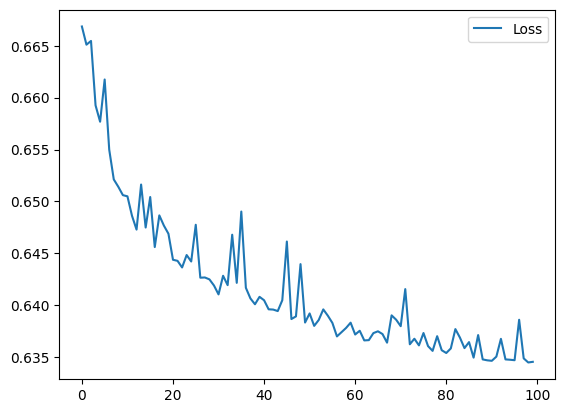

In [7]:
plt.plot(Lerror, label="Loss")
plt.legend()
plt.show()

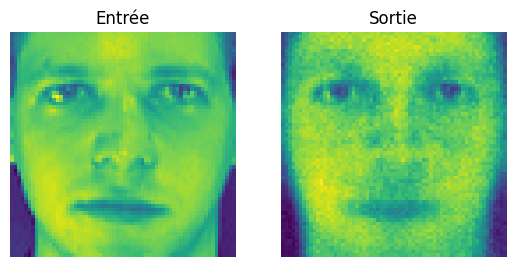

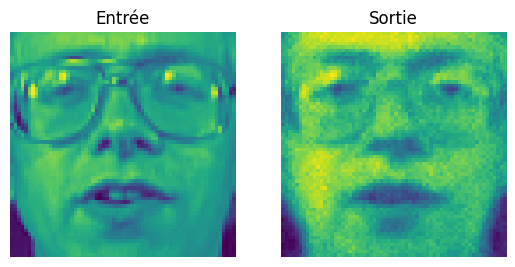

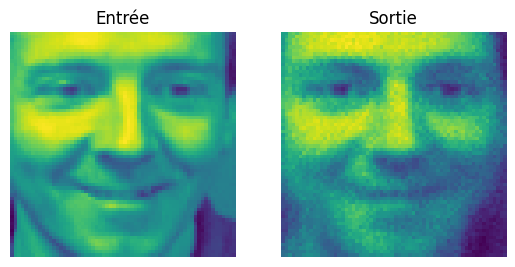

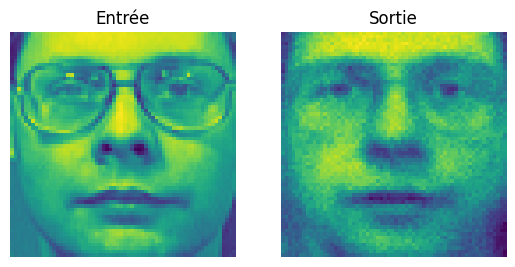

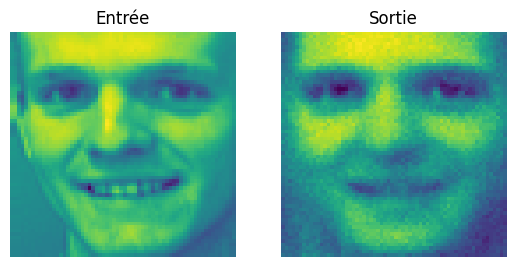

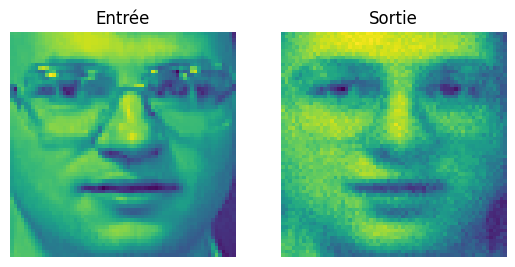

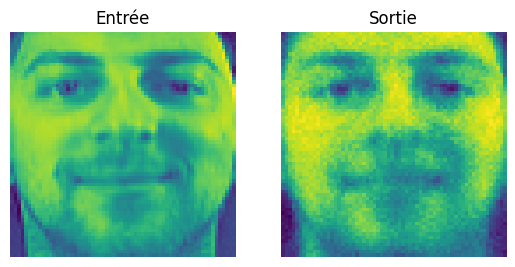

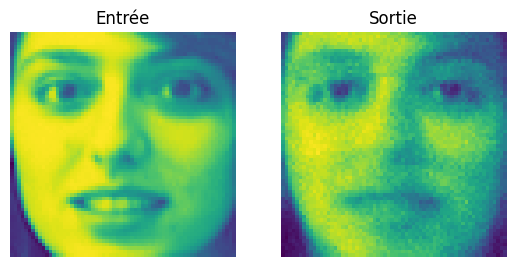

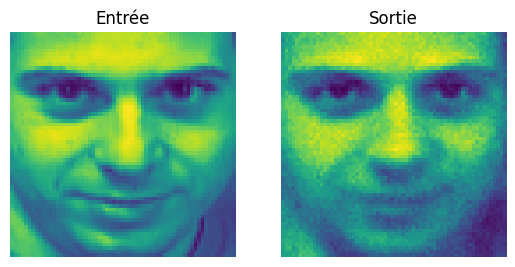

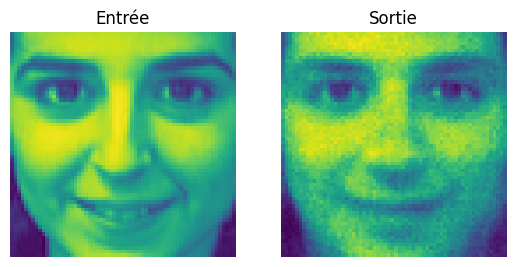

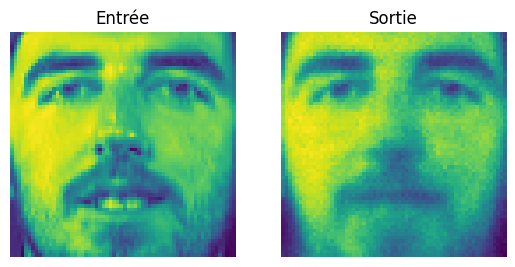

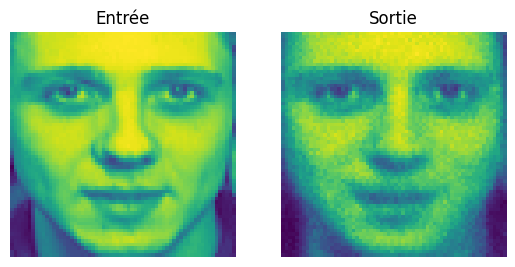

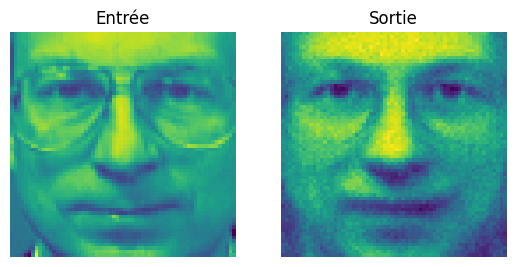

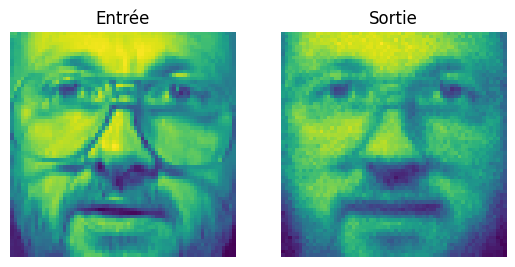

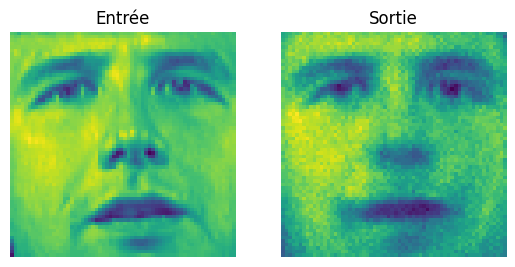

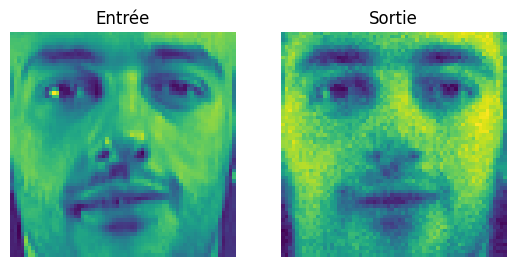

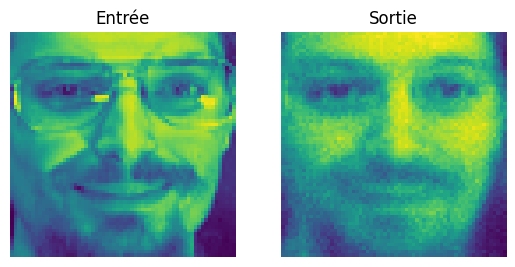

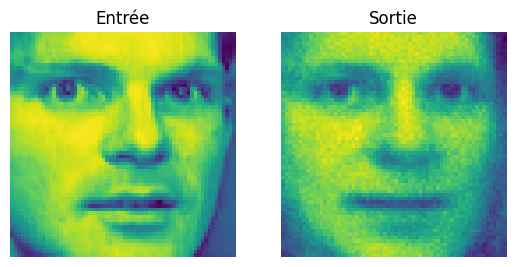

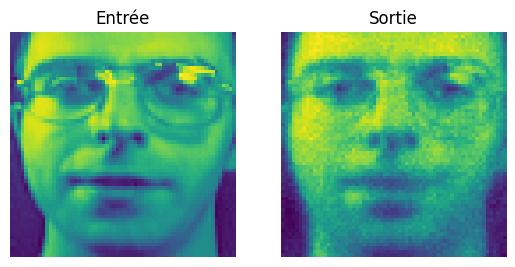

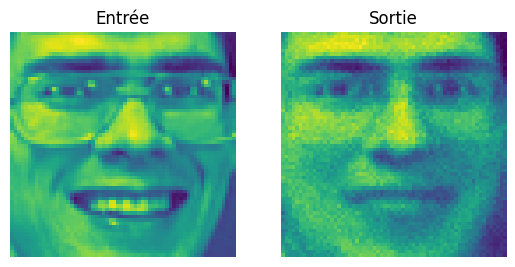

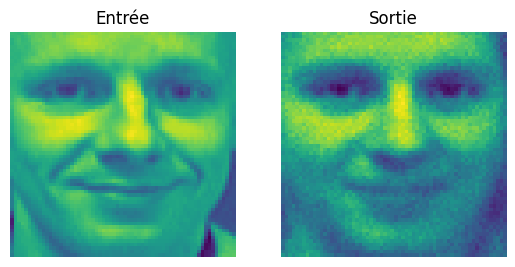

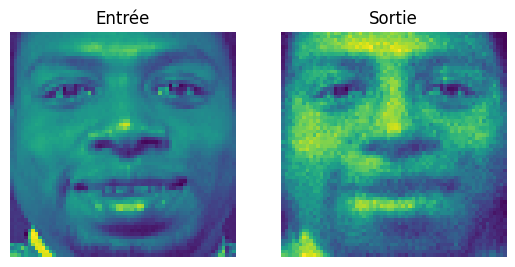

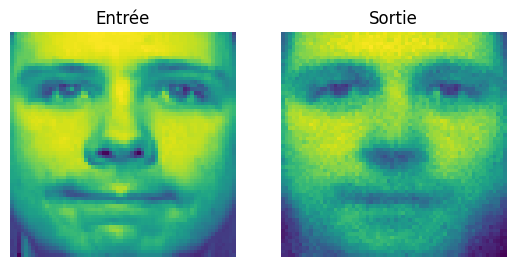

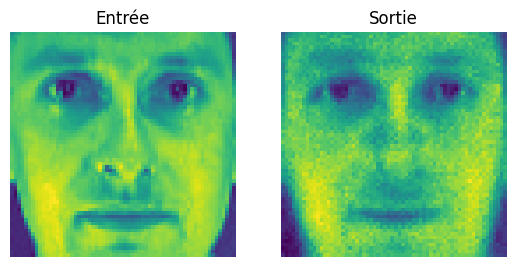

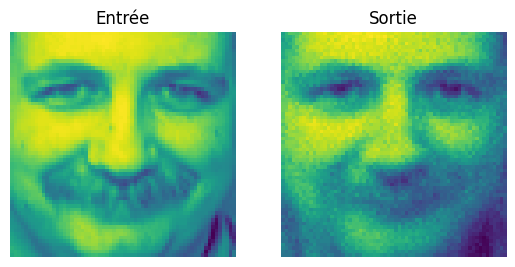

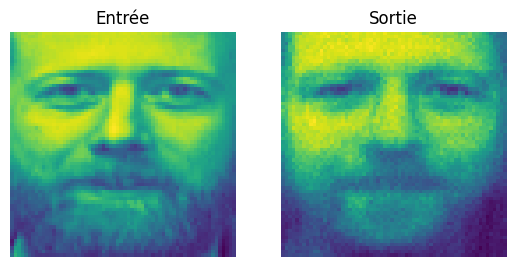

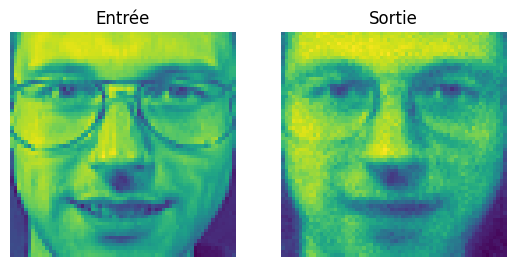

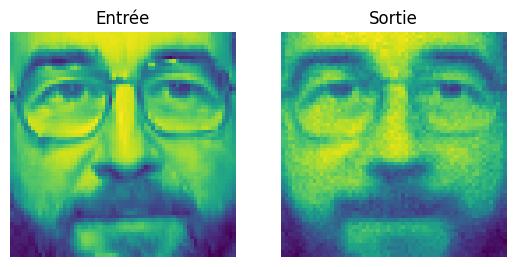

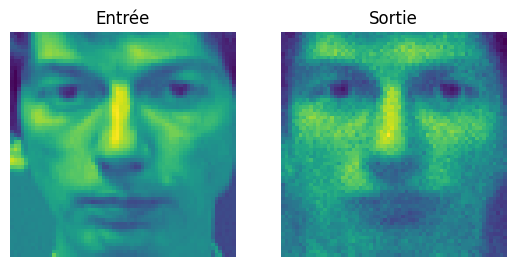

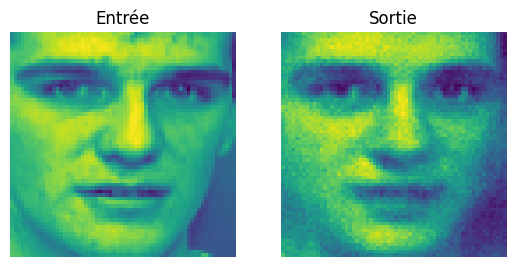

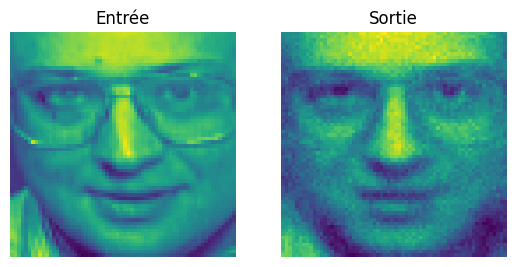

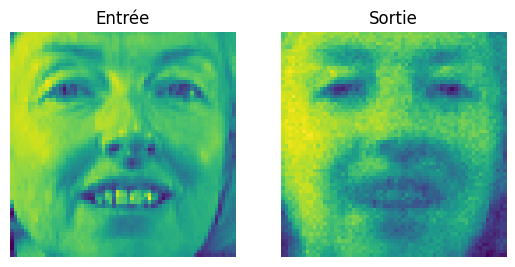

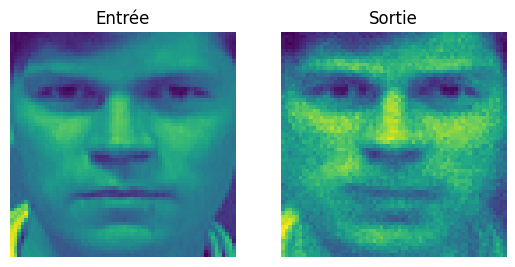

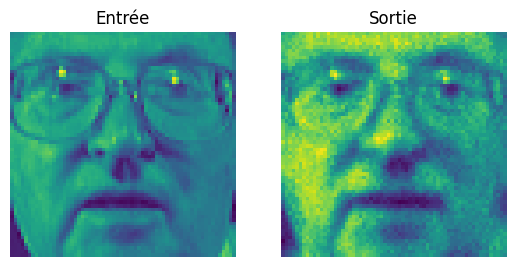

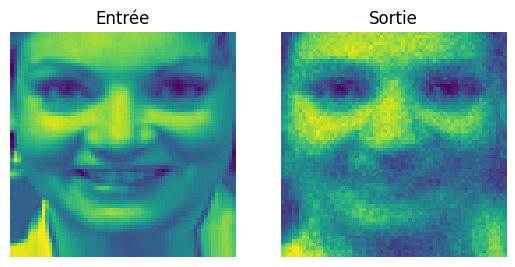

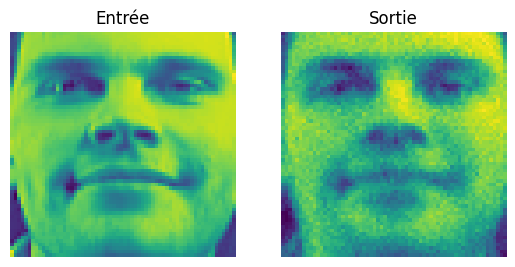

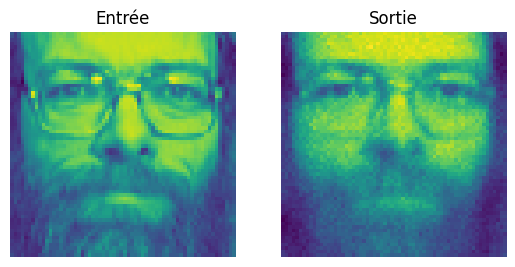

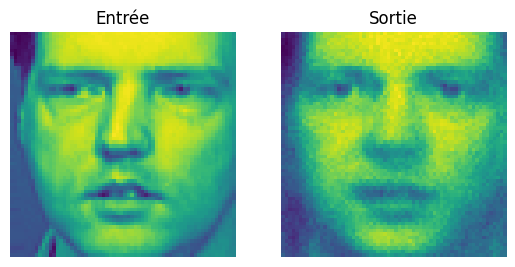

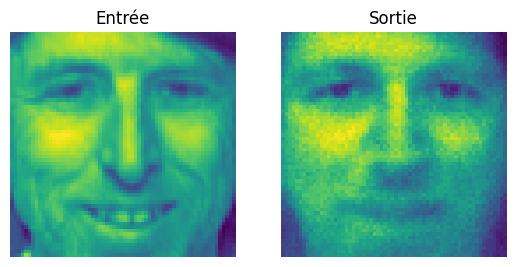

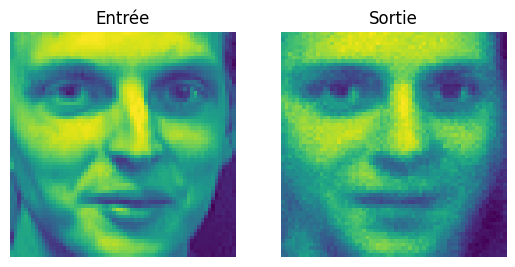

In [6]:
for i in range(40):
    plt.subplot(121)
    plt.title("Entrée")

    entree = np.array(data[label == i,:][0])
    plt.imshow(entree.reshape(64,64))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Sortie")
    out = net.forward(entree.reshape(1,entree.shape[0]))
    plt.imshow(out.reshape(64,64))
    plt.axis('off')
    plt.show()